In [1]:
import pandas as pd                                                                  #пункт 2

cols = [ 'Name' , 'Gender', 'Birth']
years = range(1880, 2011)
pieces = []
for i in years:
    df = pd.read_table('yob%d.txt'%i, sep = ',', engine = 'python' , names = cols)
    df['Year'] = i
    pieces.append(df)
    data = pd.concat(pieces, ignore_index = True)
    
data

Name Gender  Birth  Year
0             Mary      F   7065  1880
1             Anna      F   2604  1880
2             Emma      F   2003  1880
3        Elizabeth      F   1939  1880
4           Minnie      F   1746  1880
...            ...    ...    ...   ...
1690779    Zymaire      M      5  2010
1690780     Zyonne      M      5  2010
1690781  Zyquarius      M      5  2010
1690782      Zyran      M      5  2010
1690783      Zzyzx      M      5  2010

[1690784 rows x 4 columns]

In [44]:
num_girls = data.loc[(data['Gender'] == 'F'), 'Birth'].sum()               #пункт 1
num_boys = data.loc[(data['Gender'] == 'M'), 'Birth'].sum()
num_babies = num_girls + num_boys
print('Общее число родившихся девочек:', num_girls)
print('Общее число родившихся мальчиков:', num_boys)
print('Общее число родившихся младенцев:', num_babies)

Общее число родившихся девочек: 159990140
Общее число родившихся мальчиков: 162412587
Общее число родившихся младенцев: 322402727


In [35]:
for i in years:
    print("Количество девочек, родившихся в", i, ":", data.loc[(data['Gender'] == 'F') & (data['Year'] == i), 'Birth'].sum())              
    print("Количество мальчиков, родившихся в", i,":", data.loc[(data['Gender'] == 'M') & (data['Year'] == i), 'Birth'].sum())
    print()

Количество девочек, родившихся в 1880 : 90993
Количество мальчиков, родившихся в 1880 : 110493

Количество девочек, родившихся в 1881 : 91955
Количество мальчиков, родившихся в 1881 : 100748

Количество девочек, родившихся в 1882 : 107851
Количество мальчиков, родившихся в 1882 : 113687

Количество девочек, родившихся в 1883 : 112322
Количество мальчиков, родившихся в 1883 : 104632

Количество девочек, родившихся в 1884 : 129021
Количество мальчиков, родившихся в 1884 : 114445

Количество девочек, родившихся в 1885 : 133056
Количество мальчиков, родившихся в 1885 : 107802

Количество девочек, родившихся в 1886 : 144538
Количество мальчиков, родившихся в 1886 : 110785

Количество девочек, родившихся в 1887 : 145983
Количество мальчиков, родившихся в 1887 : 101412

Количество девочек, родившихся в 1888 : 178631
Количество мальчиков, родившихся в 1888 : 120857

Количество девочек, родившихся в 1889 : 178369
Количество мальчиков, родившихся в 1889 : 110590

Количество девочек, родившихся в

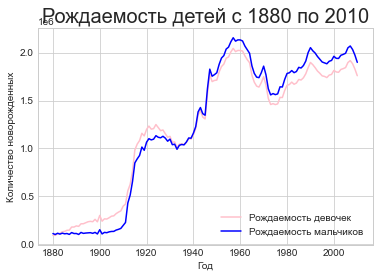

In [34]:
import matplotlib.pyplot as plt                                                        #пункт 3
plt.style.use('seaborn-whitegrid')

x1 = []
x2 = []
for i in years:
    x1.append(data.loc[(data['Gender'] == 'F') & (data['Year'] == i), 'Birth'].sum())
    x2.append(data.loc[(data['Gender'] == 'M') & (data['Year'] == i), 'Birth'].sum())
    
fig, ax = plt.subplots()

y = range(1880, 2011)

ax.plot(y, x1, color = 'pink', linestyle = '-', label = 'Рождаемость девочек')
ax.plot(y, x2, color = 'blue', linestyle = '-', label = 'Рождаемость мальчиков')

ax.set_title('Рождаемость детей с 1880 по 2010', fontsize = 20)

ax.set_xlabel('Год')
ax.set_ylabel('Количество новорожденных')

ax.legend(loc = 'lower right')

In [29]:
data['Proportion'] = data['Birth'] / num_babies                      #пункт 4
data

Name Gender  Birth  Year    Proportion
0             Mary      F   7065  1880  2.191359e-05
1             Anna      F   2604  1880  8.076855e-06
2             Emma      F   2003  1880  6.212727e-06
3        Elizabeth      F   1939  1880  6.014217e-06
4           Minnie      F   1746  1880  5.415587e-06
...            ...    ...    ...   ...           ...
1690779    Zymaire      M      5  2010  1.550855e-08
1690780     Zyonne      M      5  2010  1.550855e-08
1690781  Zyquarius      M      5  2010  1.550855e-08
1690782      Zyran      M      5  2010  1.550855e-08
1690783      Zzyzx      M      5  2010  1.550855e-08

[1690784 rows x 5 columns]

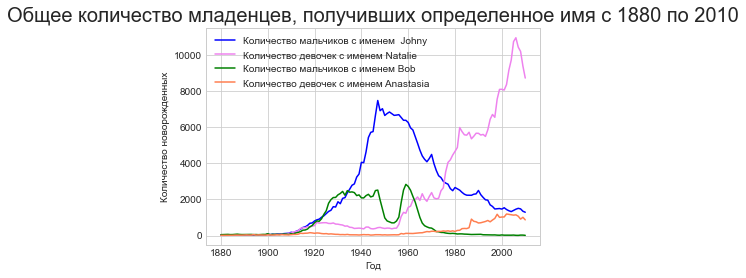

In [32]:
x_1 = []                                                                                   #пункт 5(общее количество младенцев)
x_2 = []
x_3 = []
x_4 = []
for i in years:
    x_1.append(data.loc[(data['Name'] == 'Johnny') & (data['Year'] == i), 'Birth'].sum())
    x_2.append(data.loc[(data['Name'] == 'Natalie') & (data['Year'] == i), 'Birth'].sum())
    x_3.append(data.loc[(data['Name'] == 'Bob') & (data['Year'] == i), 'Birth'].sum())
    x_4.append(data.loc[(data['Name'] == 'Anastasia') & (data['Year'] == i), 'Birth'].sum())
    
fig, ax = plt.subplots()

y = range(1880, 2011)

ax.plot(y, x_1, color = 'b', linestyle = '-', label = 'Количество мальчиков с именем  Johny')
ax.plot(y, x_2, color = 'violet', linestyle = '-', label = 'Количество девочек с именем Natalie')
ax.plot(y, x_3, color = 'g', linestyle = '-', label = 'Количество мальчиков с именем Bob')
ax.plot(y, x_4, color = 'coral', linestyle = '-', label = 'Количество девочек с именем Anastasia')

ax.set_title('Общее количество младенцев, получивших определенное имя с 1880 по 2010', fontsize = 20)

ax.set_xlabel('Год')
ax.set_ylabel('Количество новорожденных')

ax.legend(loc = 'upper left')

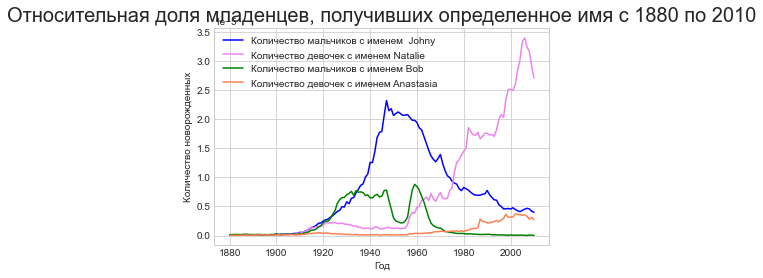

In [33]:
y_1 = []                                                                                 #пункт 5 (относительная доля младнцев)
y_2 = []
y_3 = []
y_4 = []
for i in years:
    y_1.append(data.loc[(data['Name'] == 'Johnny') & (data['Year'] == i), 'Proportion'].sum())
    y_2.append(data.loc[(data['Name'] == 'Natalie') & (data['Year'] == i), 'Proportion'].sum())
    y_3.append(data.loc[(data['Name'] == 'Bob') & (data['Year'] == i), 'Proportion'].sum())
    y_4.append(data.loc[(data['Name'] == 'Anastasia') & (data['Year'] == i), 'Proportion'].sum())
    
fig, ax = plt.subplots()

y = range(1880, 2011)

ax.plot(y, y_1, color = 'b', linestyle = '-', label = 'Количество мальчиков с именем  Johny')
ax.plot(y, y_2, color = 'violet', linestyle = '-', label = 'Количество девочек с именем Natalie')
ax.plot(y, y_3, color = 'g', linestyle = '-', label = 'Количество мальчиков с именем Bob')
ax.plot(y, y_4, color = 'coral', linestyle = '-', label = 'Количество девочек с именем Anastasia')

ax.set_title('Относительная доля младенцев, получивших определенное имя с 1880 по 2010', fontsize = 20)

ax.set_xlabel('Год')
ax.set_ylabel('Количество новорожденных')

ax.legend(loc = 'upper left')

In [68]:
#поскольку частота встречаемости каждого имени в каждом файле отсортирована в порядке возрастания, можем          пункт 6
#взять талько первую строку
for i in years:                                                     
    print("Самое популярное имя в", i,':', data.loc[(data['Birth'].max()) & (data['Year'] == i),'Name'].iloc[0])              

Самое популярное имя в 1880 : Mary
Самое популярное имя в 1881 : Mary
Самое популярное имя в 1882 : Mary
Самое популярное имя в 1883 : Mary
Самое популярное имя в 1884 : Mary
Самое популярное имя в 1885 : Mary
Самое популярное имя в 1886 : Mary
Самое популярное имя в 1887 : Mary
Самое популярное имя в 1888 : Mary
Самое популярное имя в 1889 : Mary
Самое популярное имя в 1890 : Mary
Самое популярное имя в 1891 : Mary
Самое популярное имя в 1892 : Mary
Самое популярное имя в 1893 : Mary
Самое популярное имя в 1894 : Mary
Самое популярное имя в 1895 : Mary
Самое популярное имя в 1896 : Mary
Самое популярное имя в 1897 : Mary
Самое популярное имя в 1898 : Mary
Самое популярное имя в 1899 : Mary
Самое популярное имя в 1900 : Mary
Самое популярное имя в 1901 : Mary
Самое популярное имя в 1902 : Mary
Самое популярное имя в 1903 : Mary
Самое популярное имя в 1904 : Mary
Самое популярное имя в 1905 : Mary
Самое популярное имя в 1906 : Mary
Самое популярное имя в 1907 : Mary
Самое популярное имя